<a href="https://colab.research.google.com/github/rz-pb/CS-SBU-eDataMining-MSc-2022/blob/400422049/submits/400422049/project2/Exercise2_Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset



## Context

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

## Content

This dataset contains information about many mobiles and variables about them

# Getting Started
In this section first we are going to import modules and then set up the connections to the kaggle in order to have access to the datasets and importing them to the google colab environment. 

## Importing Modules

In [1]:
# Data Manipulation Packages
import pandas as pd
import numpy as np
from numpy import NaN
pd.__version__

# ML Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Visualisation Packages
import seaborn as sns
import matplotlib.pyplot as plt

## Installing the _kaggle_ Module
In order to have access to kaggle API for fetching the datasets, we need to install the kaggle module inside the environment using bash commmad python package installer **pip**.

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rezapourbahreini","key":"218f7736c63d979f4a9458061d870c49"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Importing the **Mobile Price** Dataset
Using bash command `kaggle` we are willing to download the dataset.

In [5]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 27.2MB/s]


In [6]:
!pwd

/content


In [7]:
!ls

kaggle.json  mobile-price-classification.zip  sample_data


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [9]:
!ls

kaggle.json  mobile-price-classification.zip  sample_data  test.csv  train.csv


# 1. Reading the Dataset and Some Preliminary Checks
In this section, after reading the dataset, we are going to do some preliminary checks and take a look at the outlines of the dataset; such as the columns, size of dataset, data-types to see what can we do to optimize the dataset for what's coming next.

In [10]:
df_intact = pd.read_csv('train.csv')
df = pd.read_csv('train.csv')

In [11]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
df.shape

(2000, 21)

In [13]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Optimizing the Data-types : Any Candidates?
There are columns which could be revised in terms of datatype for better peformance and better readability. Following you may find the selected columns and the procedure of optimizing them in terms of datatypes. (Also the memory usage will do better after the changes) 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [15]:
for col in ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']:
  df[col] = df[col].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   int64   
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g        2000 non-null   ca

## Handling Null Values
Null values is an evitable aspect of any real dataset. So it would be better if we accept the existance of null values and do some work to handle them in the best way so that we can cover these caveats and also enrich our dataset with some proper data instead.

Following you may find the same procedure in our dataset. First we need to have an aggregate report on how these null values are spreaded throughout the rows and columns. Then we need to choose the best approach based on the datatype to fill these values. 

In [17]:
# how null data is distributed throughout the dataframe

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

So there's nothing to be done about it.

## Handling Duplicates

In [18]:
df.duplicated().sum()

0

So there's nothing to be done about it.

## Handling Outliers

Outliers are records which have some anomalies in their values in comparison with some criteria, mostly from a statistical point of view.

There are different methods on how to handle outliers and it's better to apply each method according to the nature of dataset.

In [19]:
for cols in df.columns:
  if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
      upper_range = df[cols].mean() + 3 * df[cols].std()
      lower_range = df[cols].mean() - 3 * df[cols].std()
      
      indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
      df = df.drop(indexs)

In [20]:
df.shape

(1988, 21)

## Relabling the Price Range Feature

In [21]:
df.price_range.value_counts()

3    498
1    497
2    497
0    496
Name: price_range, dtype: int64

In [22]:
df.price_range = df.price_range.apply(lambda x : 0 if x<2 else 1)

In [23]:
df.price_range.value_counts()

1    995
0    993
Name: price_range, dtype: int64

#Aggregate Reports

## Distributions along Features

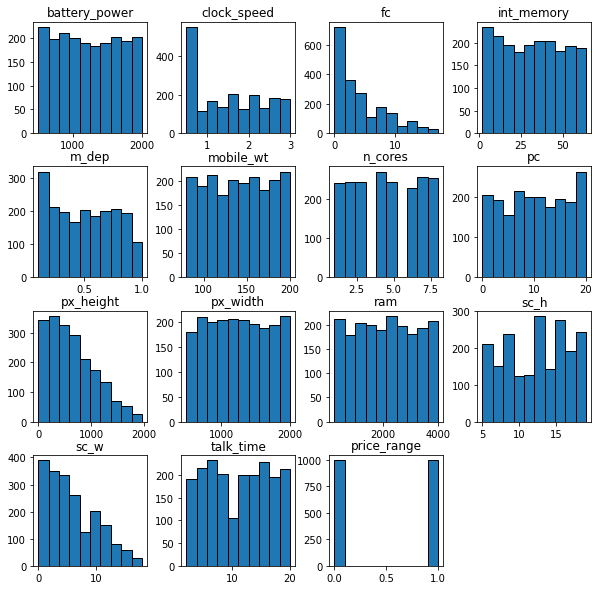

In [24]:
df.hist(edgecolor="black", linewidth=1, figsize=(10, 10),grid = False , bins = 10)
plt.show()

## Feature Values Distribution w.r.t Price

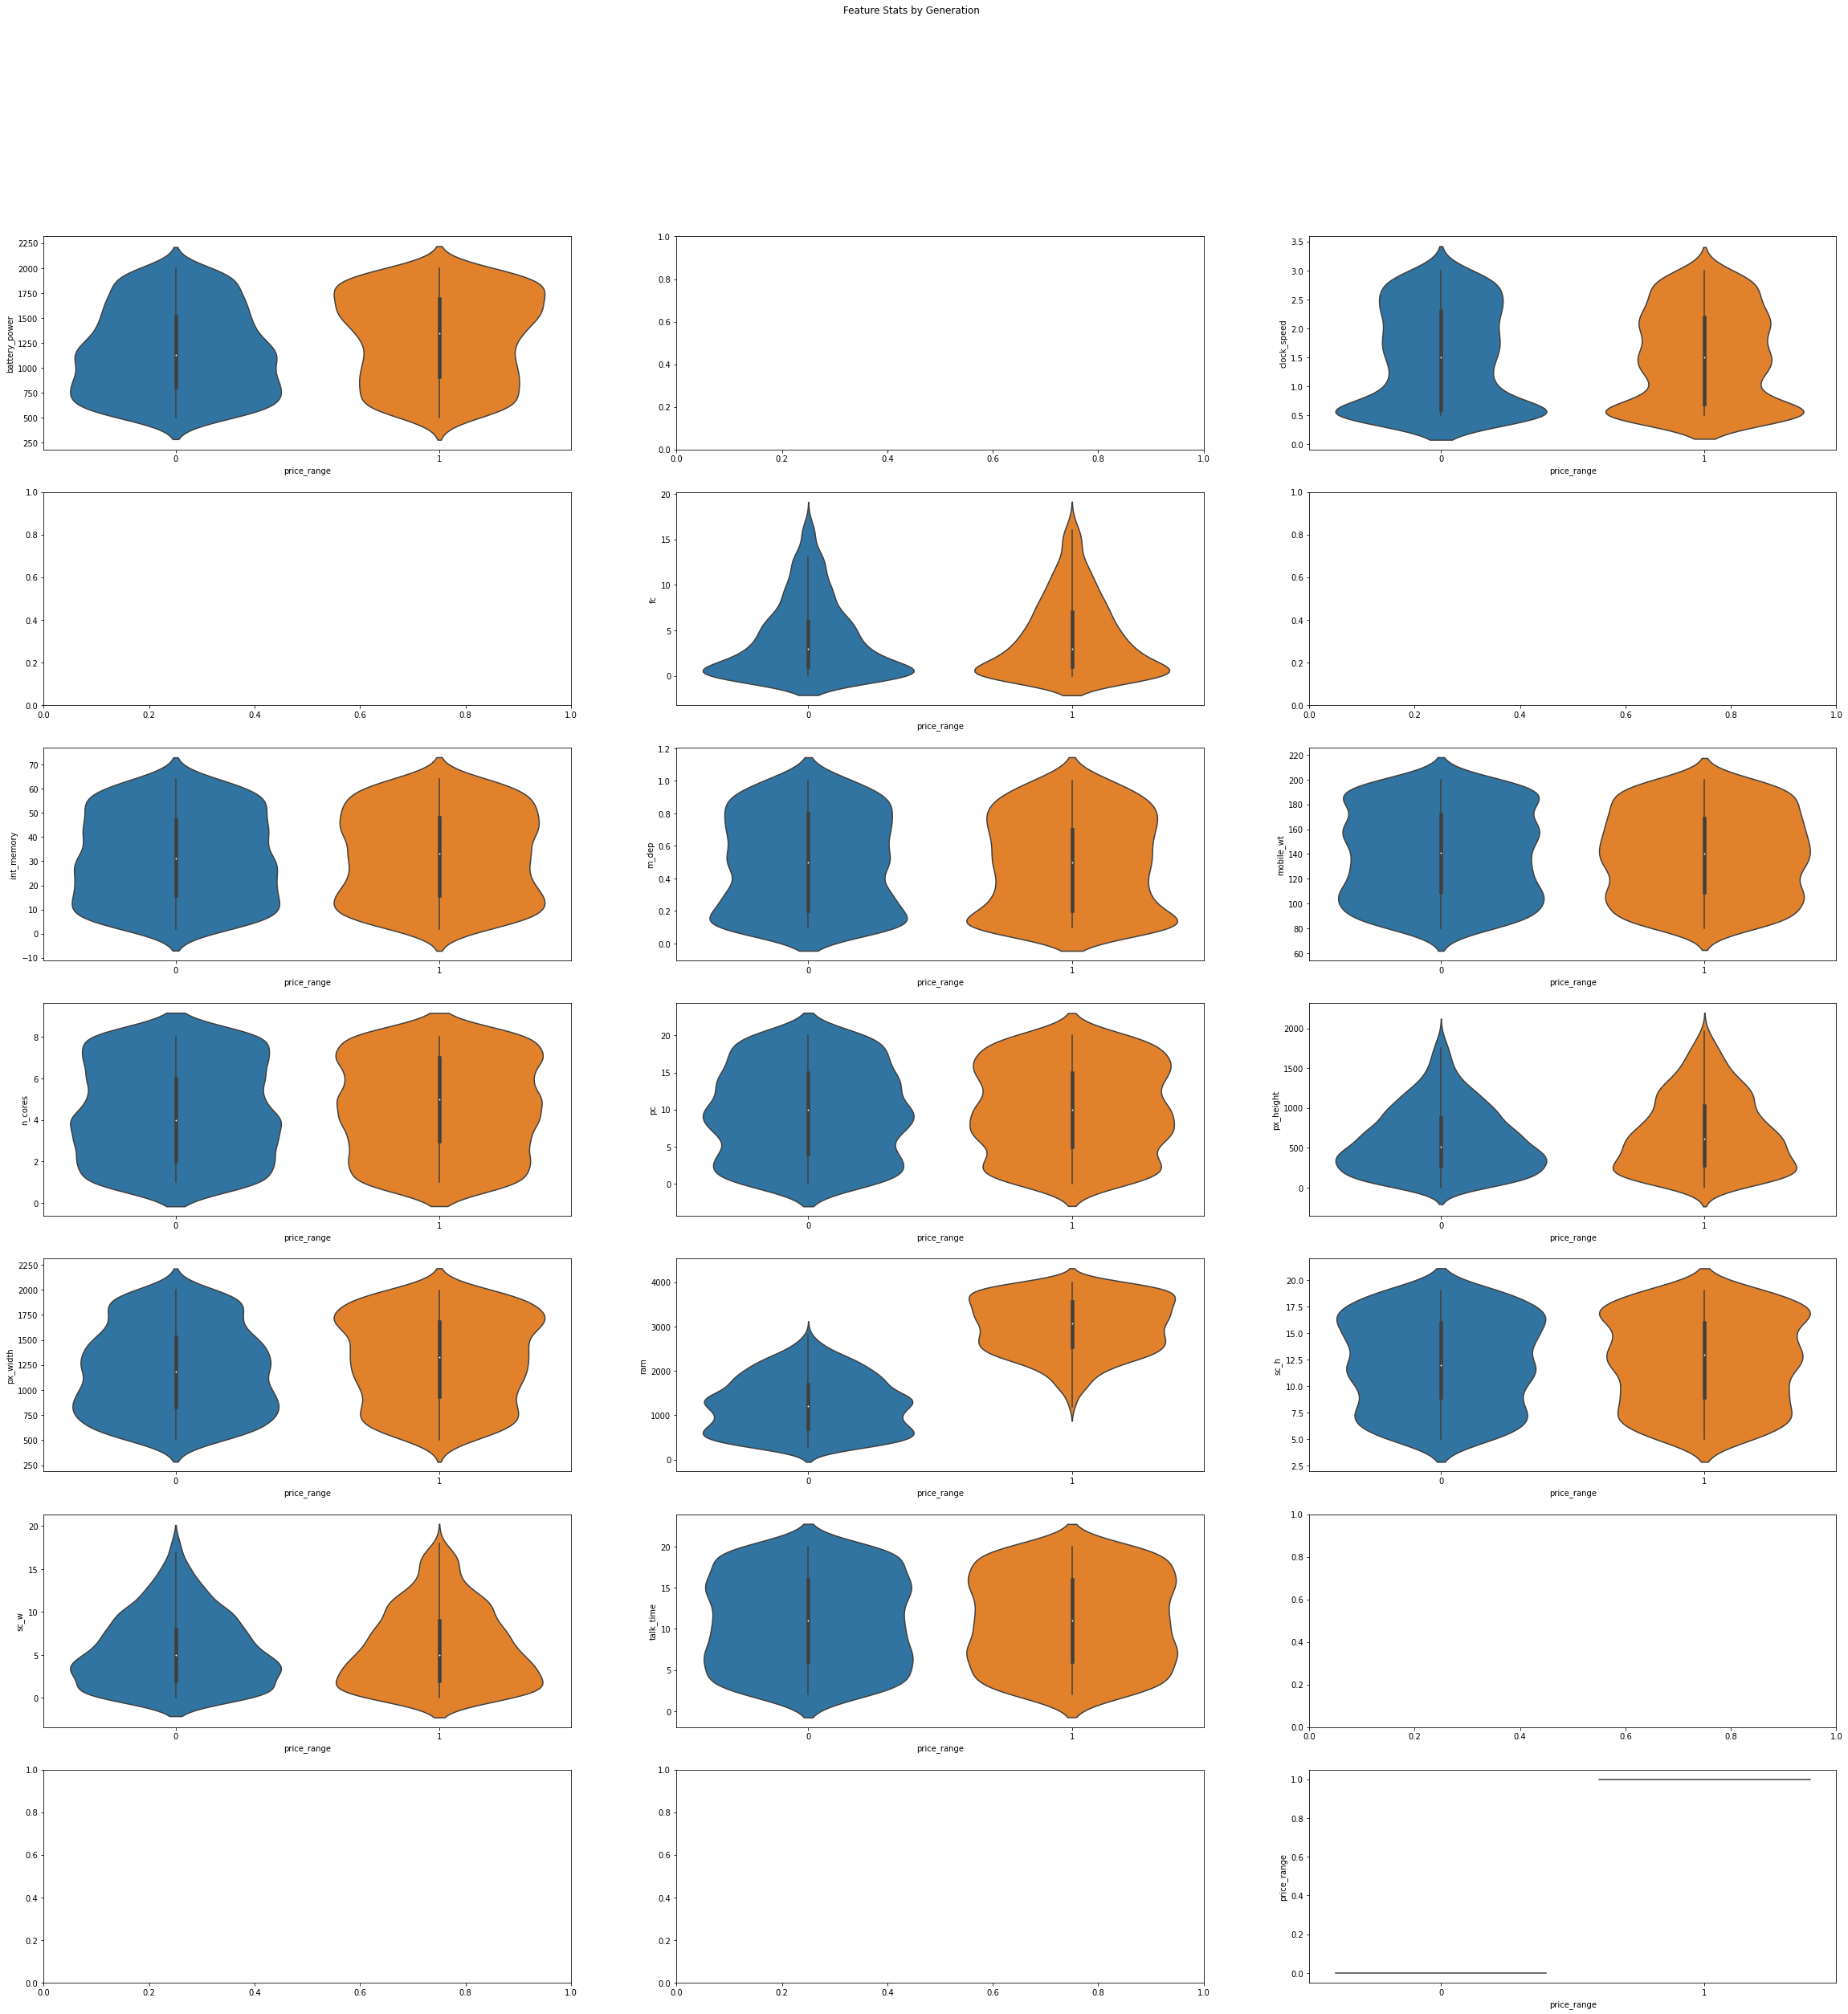

In [25]:
fig, axes = plt.subplots(7, 3, figsize=(40, 40))
fig.suptitle('Feature Stats by Generation')

k = 0
for i in range(0,7):
  for j in range(0,3):
    if df[df.columns[k]].dtype != 'category':
      sns.violinplot(ax=axes[i, j], x = 'price_range', y = df.columns[k] , data = df)
    
    k = k + 1


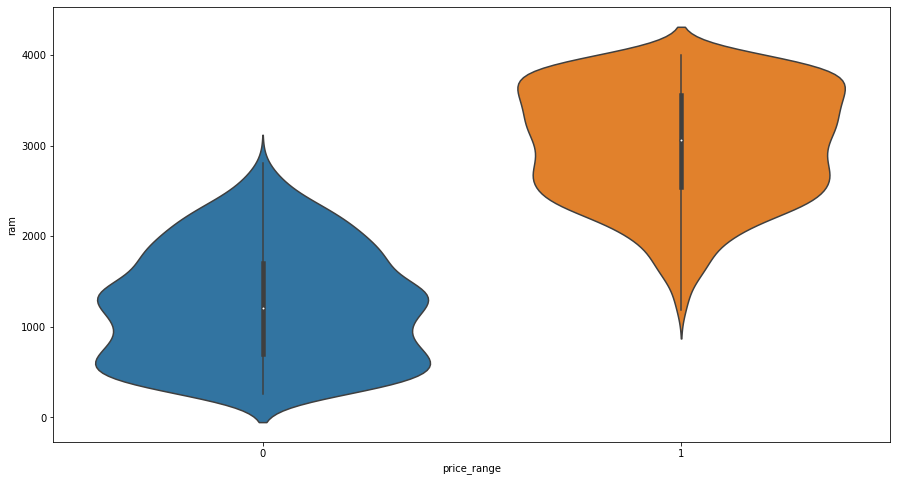

In [26]:
plt.figure(figsize=(15,8))
sns.violinplot(x="price_range", y='ram', data=df)
plt.show()

## Correlation between features

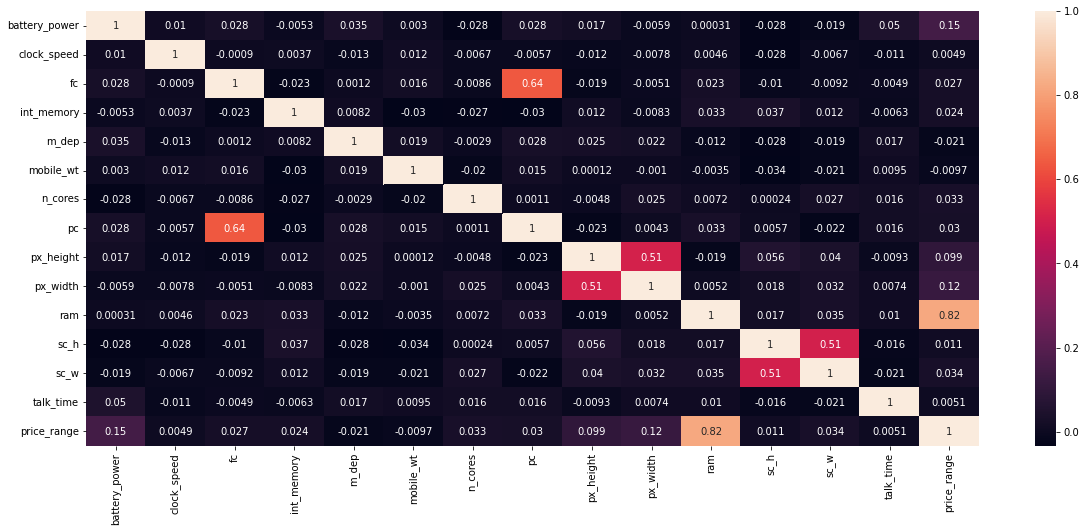

In [27]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Preprocessing and Modeling